<a href="https://colab.research.google.com/github/Katrine23/ThesisCoding/blob/master/T2_Emosi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORT ALL PACKAGES**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
from google.colab import drive
drive.mount('/content/drive')
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from collections import Counter
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import math

Mounted at /content/drive


# **LOAD DATASET**

In [ ]:
# membaca data set
df = pd.read_excel ("/content/drive/My Drive/data emosi.xlsx")
# Check all classes/labels in training data

print(df.columns)

Index(['Jenis Kelamin', 'Usia', 'Tempat Tinggal', 'Fakultas', 'Jurusan',
       'Semester', 'IPK', 'T1', 'T2', 'T3', 'T4', 'E1', 'E2', 'E3', 'E4', 'E5',
       'E6'],
      dtype='object')


# **LOAD TESTING AND TRAINING DATASET**

In [ ]:
# shuffle dataset
data = df.sample(frac=1, random_state=77)

# split dataset
data_train = data.iloc[:298]
data_test = data.iloc[298:]

In [ ]:
data_train.to_csv('data_train.csv', index=False)
data_test.to_csv('data_test.csv', index=False)

In [ ]:
data_train = pd.read_csv ("data_train.csv")
data_test = pd.read_csv ("data_test.csv")

In [ ]:
data_train.head(5)

,Jenis Kelamin,Usia,Tempat Tinggal,Fakultas,Jurusan,Semester,IPK,T1,T2,T3,T4,E1,E2,E3,E4,E5,E6
0,Perempuan,20,Rumah Sendiri,Ilmu Komputer,Informatika,4,3.9,4,4,2,3,4,4,4,4,5,4
1,Perempuan,21,Kost,ASMI,Administrasi Perkantoran,6,3.8,3,3,3,3,3,3,3,3,3,3
2,Perempuan,20,Kost,Ekonomi dan Bisnis,Akuntansi,6,2.98,2,4,2,3,4,4,3,2,5,5
3,Perempuan,19,Asrama,Ekonomi dan Bisnis,Akuntansi,4,3.8,2,4,1,2,4,4,2,4,4,4
4,Perempuan,18,Asrama,Ekonomi dan Bisnis,Manajemen,2,3.37,4,4,4,5,5,5,3,3,3,5


In [ ]:
data_test.head(5)

,Jenis Kelamin,Usia,Tempat Tinggal,Fakultas,Jurusan,Semester,IPK,T1,T2,T3,T4,E1,E2,E3,E4,E5,E6
0,Laki-laki,23,Rumah Sendiri,Ilmu Komputer,Informatika,8,3.91,1,1,1,1,2,2,3,4,3,4
1,Laki-laki,21,Asrama,Keperawatan,Keperawatan,4,3.5,1,3,1,1,4,5,5,5,5,4
2,Laki-laki,22,Rumah Orang Lain/Menumpang,Ilmu Komputer,Informatika,7,3,2,3,2,2,4,4,3,4,3,3
3,Laki-laki,22,Asrama,Filsafat,Filsafat Agama,6,3.81,2,3,1,2,4,4,3,3,4,3
4,Laki-laki,23,Asrama,Filsafat,Filsafat Agama,7,3.77,1,3,3,1,3,3,3,3,3,3


# **DEFINE X AND Y VARIABLES**

In [ ]:
# Testing data
x_test = data_test[['E1','E2','E3','E4','E5','E6']]
y_test = data_test['T2']

# Training data
x_train = data_train[['E1','E2','E3','E4','E5','E6']]
y_train = data_train['T2']

In [ ]:
# Print shape of the Datasets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (298, 6)
298 train samples
74 test samples


In [ ]:
# Check all classes/labels in trainiing data
all_label = set(data_train['T2'].tolist())
print("All labels: {0}".format(all_label))

#all_label_sub = set(df_sample_submission['Label'].tolist())
#print("'sample_submission.csv' only has one class: {0}".format(all_label_sub))

# Data distribution for each class
dst_train = Counter(data_train['T2'])
print(dst_train)

# Plot distribution
#sns.countplot(data_train['T1'])

All labels: {1, 2, 3, 4, 5}
Counter({4: 121, 3: 82, 5: 60, 2: 19, 1: 16})


# **TRAIN RANDOM FOREST ALGORITHM**

In [ ]:
# Create a RandomForestClassifier object with the parameters over the data
# n_estimators (default=100) = the number of trees in the forest.
# max_depth (default=None) = the maximum depth of the tree.
model_clf = RandomForestClassifier(n_estimators=1, random_state=77)

# Train the Random Forest algorithm
model_clf.fit(x_train, y_train)

# Apply the trained perceptron to make prediction of test data
y_pred = model_clf.predict(x_test)
#y_pred_proba = model_clf.predict_proba(x_test); # predict probability for all target labels

# **TREE OF THE RANDOM FOREST**

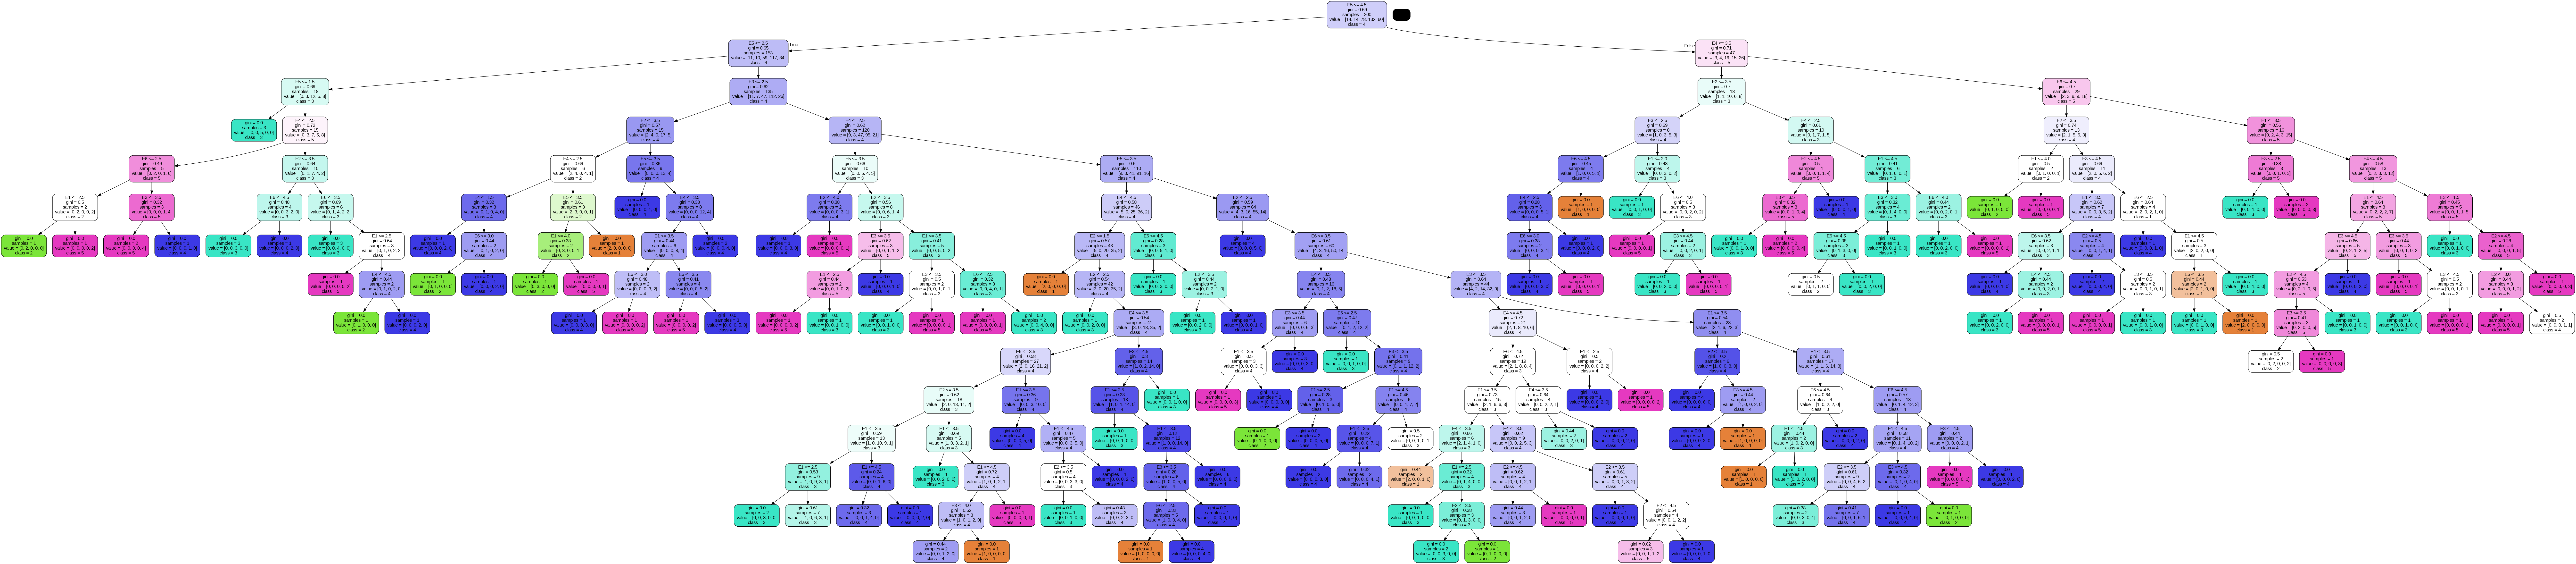

In [ ]:
# Access the decision tree(s) created by the random forest model
tree = model_clf.estimators_[0]

# Export the tree to a dot file
export_graphviz(tree, out_file='tree.dot', feature_names = x_train.columns,
                class_names = ['1', '2', '3', '4', '5'], rounded = True, proportion = False, precision = 2, filled = True)

# Convert the dot file to a png image
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())


# **FUTURE IMPORTANCES**

In [ ]:
# Print feature importances
feature_importances = pd.DataFrame(model_clf.feature_importances_, index = x_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
E6,0.198522
E1,0.197117
E3,0.179028
E2,0.155904
E4,0.144596
E5,0.124833


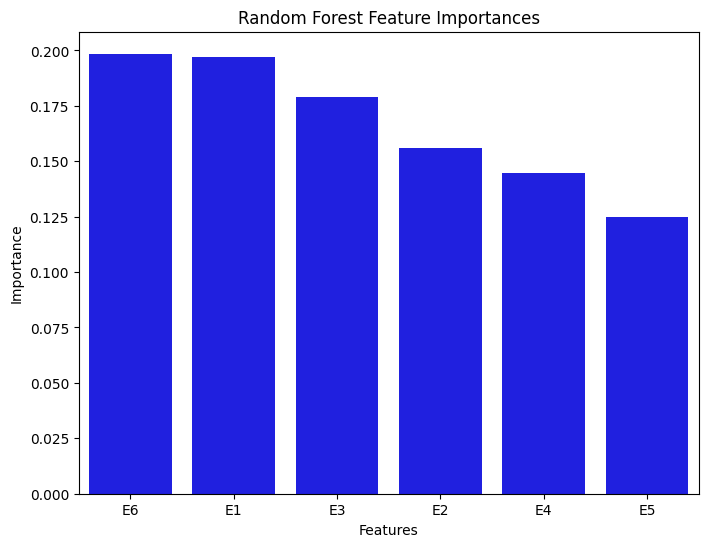

In [ ]:
# Set the figure size
plt.figure(figsize=(8,6))

# Create a barplot of feature importances
sns.barplot(x=feature_importances.index, y=feature_importances['importance'], color='blue')

# Add labels and title
plt.xlabel('Features')
plt.xticks
plt.ylabel('Importance')
plt.title('Random Forest Feature Importances')

# Show the plot
plt.show()


# **EVALUATED MODEL**

In [ ]:
#
lst_actual_class = y_test
lst_predicted_class = y_pred

# Class = digit labels 1=0, 2=1, 3=2, 4=3, 5=4
lst_classes = [1, 2, 3, 4, 5] # Must in order

# Compute multi-class confusion matrix
arr_out_matrix = multilabel_confusion_matrix(lst_actual_class, lst_predicted_class, labels=lst_classes)

# Temp store results
store_sens = [];
store_spec = [];
store_acc = [];
store_bal_acc = [];
#store_prec = [];
#store_fscore = [];
store_mcc = [];

# Loop for each taget label
for no_class in range(len(lst_classes)):
    arr_data = arr_out_matrix[no_class];
    print("Predicted Performance of Digit Label/Class: {0}".format(no_class));

    tp = arr_data[1][1]
    fp = arr_data[0][1]
    tn = arr_data[0][0]
    fn = arr_data[1][0]

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    #precision = round(tp/(tp + fp), 3)
    #fscore = round((2 * ((precision * sensitivity) / (precision + sensitivity))), 3)
    mcc = round((((tp * tn)-(fp * fn))/ math.sqrt((tp + fp)*(tp + fn)*(tn + fp)*(tn + fn))),3)

    store_sens.append(sensitivity);
    store_spec.append(specificity);
    store_acc.append(accuracy);
    store_bal_acc.append(balanced_accuracy);
    #store_prec.append(precision);
    #store_fscore.append(fscore);
    store_mcc.append(mcc);

    print("TP={0}, FP={1}, TN={2}, FN={3}".format(tp, fp, tn, fn));
    print("Sensitivity: {0}".format(sensitivity));
    print("Specificity: {0}".format(specificity));
    print("Accuracy: {0}".format(accuracy));
    print("Balanced Accuracy: {0}".format(balanced_accuracy));
    #print("Precision: {0}".format(precision));
    #print("F1-Score: {0}".format(fscore))
    print("MCC: {0}\n".format(mcc))

Predicted Performance of Digit Label/Class: 0
TP=0, FP=5, TN=64, FN=5
Sensitivity: 0.0
Specificity: 0.928
Accuracy: 0.865
Balanced Accuracy: 0.464
MCC: -0.072

Predicted Performance of Digit Label/Class: 1
TP=1, FP=4, TN=64, FN=5
Sensitivity: 0.167
Specificity: 0.941
Accuracy: 0.878
Balanced Accuracy: 0.554
MCC: 0.117

Predicted Performance of Digit Label/Class: 2
TP=7, FP=13, TN=37, FN=17
Sensitivity: 0.292
Specificity: 0.74
Accuracy: 0.595
Balanced Accuracy: 0.516
MCC: 0.033

Predicted Performance of Digit Label/Class: 3
TP=15, FP=18, TN=30, FN=11
Sensitivity: 0.577
Specificity: 0.625
Accuracy: 0.608
Balanced Accuracy: 0.601
MCC: 0.194

Predicted Performance of Digit Label/Class: 4
TP=4, FP=7, TN=54, FN=9
Sensitivity: 0.308
Specificity: 0.885
Accuracy: 0.784
Balanced Accuracy: 0.596
MCC: 0.206



In [ ]:
#OVERALL - FINAL PREDICTION PERFORMANCE
print("Overall Performance Prediction:");
print("Sensitivity: {0}%".format(round(mean(store_sens)*100, 4)));
print("Specificity: {0}%".format(round(mean(store_spec)*100, 4)));
print("Accuracy: {0}%".format(round(mean(store_acc)*100, 4)));
print("Balanced Accuracy: {0}%".format(round(mean(store_bal_acc)*100, 4)));
#print("Precision: {0}%".format(round(mean(store_prec)*100, 4)));
#print("F1-Score: {0}%".format(round(mean(store_fscore)*100, 4)))
print("MCC: {0}\n".format(round(mean(store_mcc), 4)))

Overall Performance Prediction:
Sensitivity: 26.88%
Specificity: 82.38%
Accuracy: 74.6%
Balanced Accuracy: 54.62%
MCC: 0.0956

